Disclaimer: I have been lazy and written the code as for loops in Python. This is obviously bad performance wise, but for explaining the algorithms I believe this is more appropriate, as the code then becomes closer to pseudo-code. It is left as an exercise to use numpy and remove the for loops. 

# k-means clustering (theory)
On the slide page <font color="red">X</font> the kMeans clustering problem was introduced. 

<b>Question 1: </b> What is the objective of k-Means clustering problem? 

$$ \min_C \sum_{i=1}^N ||x_i - \mu_{C(x_i)}||^2$$




On slide <font color="red">X</font> Lloyd's algorithm was introduced. The algorithm has two steps

- for i=1,...,T:
  - update centroid $\mu_i = \frac{1}{|C_i|} \sum_{x\in C_i}x$
  - update clustering, assign $x_i$ to cluster $C_j$ where $j=\arg \min ||x-\mu_j||^2$


<b>Question 2: </b>Consider the image below. What are the centroids? Can you interpret the cost visually?

<img src="http://dovgalecs.com/blog/wp-content/uploads/2012/11/untitled.jpg" style="width: 200px; height:auto" />

<b>Question 3: </b>What is the running time of Lloyds algorithm? Let $T$ be the number of iterations, $n$ number of data points, $d$ dimension of the datapoints and $k$ the number of clusters. 

$$O(ndkT)$$

<b>Question 4: </b>Does Lloyd's algorithm provide any guarantees for finding the optimal solution?

<b>Question 5: </b>Can a cluster of a k-means clustering be empty? 

HINT: Must a cluster of a k-means clustering have at least one object?

<b>Question 5: </b>Where does Lloyds algorithm attempt to minimize the kMeans objective?  

HINT: minimize greedily by differentiation 

<b>Question 6: </b>Is Lloyd's algorithm guaranteed to converge?

HINT: How many different clusterings are there? Finite/Infinite? Could Lloyd's algorithm find the same clustering twice? Does the cost decrease/increase between different clusterings?

<b>Bonus Point: </b>
It is important that you realize there is a different between the kMeans clustering problem and Lloyd's algorithm. Lloyd's algorithm is sometimes refered to as "the kMeans algorithm" due to its extensive use. This can be slightly confusing because there exists several different algorithms for the kMeans clustering problem.


# k-means clustering (code)
In this exercise you must implement Lloyd's algorithm. To test our implementation we will need data. For this we will use the Iris dataset similar to the book [ZM]. The data set has three clases so we set $k=3$

In [18]:
# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k=3
print(X.shape)

(150, 2)


## Implementing Lloyds algorithm
The following implementation of Lloyd's algorithm is similar to the previous pseudo-code, except we added two more steps. 

- for i=1,...,T:
  - update centroid $\mu_i = \frac{1}{|C_i|} \sum_{x\in C_i}x$
  - update clustering, assign $x_i$ to cluster $C_j$ where $j=\arg \min ||x-\mu_j||^2$
  - compute and print cost of current clustering
  - if cost didn't improve from last iteration stop

Your job is to implement the first two steps. They are marked in the code as usual. One thing that might be a bit confusing is that clusterings are represented as a vector. If the point $x_i$ should be in cluster $j$ we have that $C[i]=j$.  

In [131]:
import numpy as np

def lloyds_algorithm(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i].
        centroids:  The centroids/average points of each cluster. 
        cost: The cost of the clustering 
    """
    n, d = X.shape
    print(n, d)
    
    # Initialize clusters random. 
    clustering = np.random.randint(0, k, (n, )) 
    centroids  = np.zeros((k, d))
    
    # Used to stop if cost isn't improving (decreasing)
    cost = 0
    oldcost = 0
    
    # Column names
    print("Iterations\tCost")
    
    for i in range(T):
        
        # Update centroid
        
        # YOUR CODE HERE
        for j in range(k):
            # compute average of k guys
            size = (clustering == j).sum()+1# if this is 0 bad. 
            assert size != 0
            centroid = np.sum(X[clustering == j], axis=0)/size
            centroids[j, :] = centroid
        # END CODE

        
        # Update clustering 
        
        # YOUR CODE HERE
        for j in range(n):
            # compute closest centroid
            distances = [np.linalg.norm(X[j] - centroids[l])**2 for l in range(k)]
            clustering[j] = np.argmin(distances)
        # END CODE
        
        
        # Compute and print cost
        cost = 0
        for j in range(n):
            cost += np.linalg.norm(X[j] - centroids[clustering[j]])**2    
        print(i+1, "\t\t", cost)
        
        
        # Stop if cost didn't improve (decrease)
        if cost == oldcost: break
        oldcost = cost
        
    return clustering, centroids, cost

clustering, centroids, cost = lloyds_algorithm(X, 3, 100)

55000 784
Iterations	Cost
1 		 2893244.21663


KeyboardInterrupt: 

To check your implementation you should run sklearns implementation of Lloyds algorithm. The scores of your algorithm should be comparable with sklearns

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print(-kmeans.score(X))

37.1237021277


To get a visual understanding of the algorithm, the following code visualizes each step of the algorithm. Just copy and paste the answer from your algorithm above and run

<IPython.core.display.Javascript object>


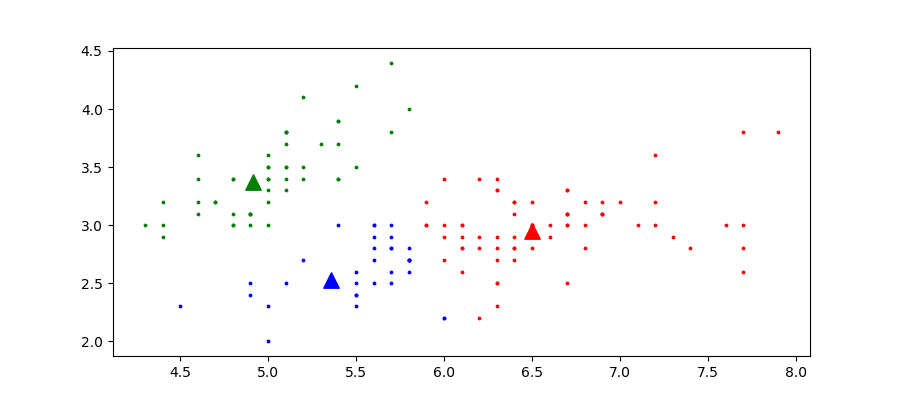

Iteration	Cost
1 		 97.5327166354
2 		 46.999709463
3 		 44.0368118869
4 		 42.8768231084
5 		 42.8768231084


In [113]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import time

def lloyds_algorithm_visualize(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
        The data is assumed to have dimension 2 and each step of the algorithm is visualized. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i]. 
    """
    n, d = X.shape
    
    assert d == 2, "The data is assumed to have dimension 2 so we can visualize it. "
    
    # Initialize clusters random. 
    clustering = np.random.randint(0, k, (n, )) 
    centroids  = np.zeros((k, d))
    
    # Used to stop if cost isn't improving (decreasing)
    cost = 0
    oldcost = 0
    
    # Initialize subplot for visualization
    fig, ax = plt.subplots(1, 1, figsize=(9,4)) 
    ax.axis('off')
    colors = ["r", "g", "b"]
    
    # Column names
    print("Iteration\tCost")
    
    for i in range(T):
        
        # Update centroid
        
        # YOUR CODE HERE
        for j in range(k):
            # compute average of k guys
            size = (clustering == j).sum() + 1 # if this is 0 bad, use pseudocount
            assert size != 0
            centroid = np.sum(X[clustering == j], axis=0)/size
            centroids[j, :] = centroid
        # END CODE

        
        # Update clustering 
        
        # YOUR CODE HERE
        for j in range(n):
            # compute closest centroid
            distances = [np.linalg.norm(X[j] - centroids[l])**2 for l in range(k)]
            clustering[j] = np.argmin(distances)
        # END CODE
        
        
        # Draw clusters
        ax.cla()
        for j in range(k):
            centroid = centroids[j]
            c = colors[j]
            ax.scatter(centroid[0], centroid[1], s=123, c=c, marker='^')
            data = X[clustering==j]
            x = data[:,0]
            y = data[:,1]
            ax.scatter(x, y, s=3, c=c)
            
        fig.canvas.draw()
        time.sleep(1)
        
        # Compute and print cost
        cost = 0
        for j in range(n):
            cost += np.linalg.norm(X[j] - centroids[clustering[j]])**2    
        print(i+1, "\t\t", cost)
        
        
        # Stop if cost didn't improve (decrease)
        if cost == oldcost: break
        oldcost = cost
        
    return clustering, centroids, cost

clustering, centroids, cost = lloyds_algorithm_visualize(X, 3, 100)

If you run the algorithm multiple times, you should see that different runs converge faster than others. In practice, people usually run Lloyd's algorithm several times, and pick the best solution. 

<IPython.core.display.Javascript object>


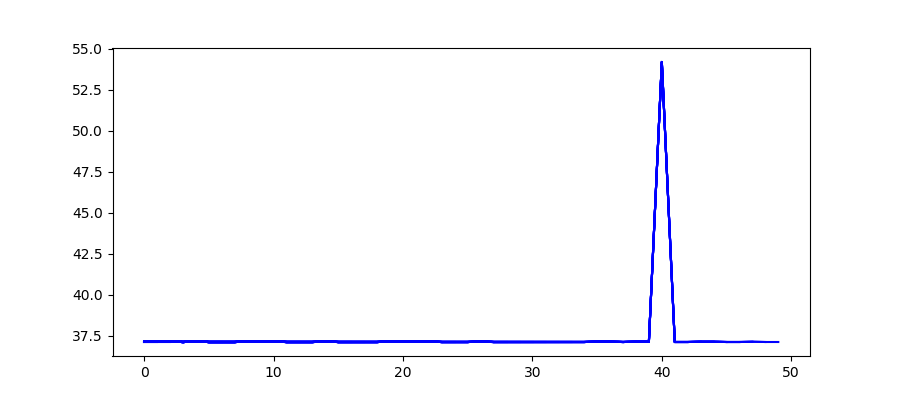

Iterations	Cost
1 		 94.6157638277
2 		 41.6682026226
3 		 37.4290113738
4 		 37.2127442914
5 		 37.141172208
6 		 37.141172208
Iterations	Cost
1 		 117.468103839
2 		 52.8409204704
3 		 39.3359579714
4 		 37.6096689162
5 		 37.535778503
6 		 37.4546395791
7 		 37.3556778926
8 		 37.2905189381
9 		 37.2293371267
10 		 37.2013020414
11 		 37.155047785
12 		 37.141172208
13 		 37.141172208
Iterations	Cost
1 		 104.651188668
2 		 54.8090016425
3 		 50.326311181
4 		 44.0794808355
5 		 39.8147816747
6 		 37.4363381745
7 		 37.2578859366
8 		 37.2293371267
9 		 37.2013020414
10 		 37.155047785
11 		 37.141172208
12 		 37.141172208
Iterations	Cost
1 		 104.352732339
2 		 44.2731490657
3 		 42.57580857
4 		 39.833191112
5 		 38.3164999092
6 		 37.9125362103
7 		 37.4233063452
8 		 37.1362607146
9 		 37.1237021277
10 		 37.1237021277
Iterations	Cost
1 		 115.503020894
2 		 38.1317654444
3 		 37.2578859366
4 		 37.2293371267
5 		 37.2013020414
6 		 37.155047785
7 		 37.141172208
8 		 37.1411722

2 		 43.7154256821
3 		 42.3217911611
4 		 39.833191112
5 		 38.3164999092
6 		 37.9125362103
7 		 37.4233063452
8 		 37.1362607146
9 		 37.1237021277
10 		 37.1237021277
Iterations	Cost
1 		 92.1979853384
2 		 41.0402024414
3 		 37.4416719977
4 		 37.2127442914
5 		 37.141172208
6 		 37.141172208
Iterations	Cost
1 		 109.471119737
2 		 43.3496166904
3 		 37.8431096804
4 		 37.1991011024
5 		 37.141172208
6 		 37.141172208
Iterations	Cost
1 		 122.545882903
2 		 56.6205679241
3 		 54.5395294511
4 		 54.2449453121
5 		 54.2095097261
6 		 54.1876776557
7 		 54.1876776557
Iterations	Cost
1 		 116.64149016
2 		 44.7849565154
3 		 39.9751470314
4 		 38.4237616536
5 		 37.9125362103
6 		 37.4233063452
7 		 37.1362607146
8 		 37.1237021277
9 		 37.1237021277
Iterations	Cost
1 		 115.764822644
2 		 51.1994977488
3 		 48.4514700321
4 		 46.6104849841
5 		 44.8544750139
6 		 44.3848550347
7 		 43.5914976201
8 		 41.9049282287
9 		 39.0665135416
10 		 38.3164999092
11 		 37.9125362103
12 		 37.42

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(9,4)) 
costs = []

for i in range(50):
    _, _, cost = lloyds_algorithm(X, 3, 100)
    costs.append(cost)
    ax.plot(costs, c='b')
    fig.canvas.draw()
    

This particular dataset has $n=150$ and is very small. Thus, running Lloyd's algorithm several times won't really change that much. You will try it later on larger data sets where it will matter. 

## Evaluating the clustering using silhuette coefficient
In the lecture Ira talked about how one can compare different clusters.

In [89]:
def silhouette(data, clustering):
    n, d = data.shape

    # YOUR CODE HERE
    # Implement the computation of the silhouette coefficient for each data point here.
    s = 0
    # not done yet, want to check out how slides to this, think
    # i remember slides and bock have different notations. 
    for i in range(0,n):
        x =  data[i]
        cluster = clustering[i]
        a = np.sum([np.linalg.norm(x - x_) for x_ in X[clustering == i]]) / np.sum(clustering == i)
        
        b = []
        for j in range(k):
            if j != cluster:
                b.append(np.sum([np.linalg.norm(x - x_) for x_ in X[clustering == j]]) / np.sum(clustering == j))
                
        b = np.min(b)
        s_i = (a+b)/max(a, b)
        s+= s_i
        print(i, s_i)
    # END CODE

   
    return s

print(X.shape)
print(clustering.shape)

silhouette(X, clustering)

(150, 2)
(150,)
0 1.62723005577
1 1.57194689169
2 2.0
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
13

/home/ubudevml/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


nan

## Using clustering for image compression data
In this exercise you must use Lloyd's algorithm for image compression. The following code downloads and displays the two images we will consider: 

<IPython.core.display.Javascript object>


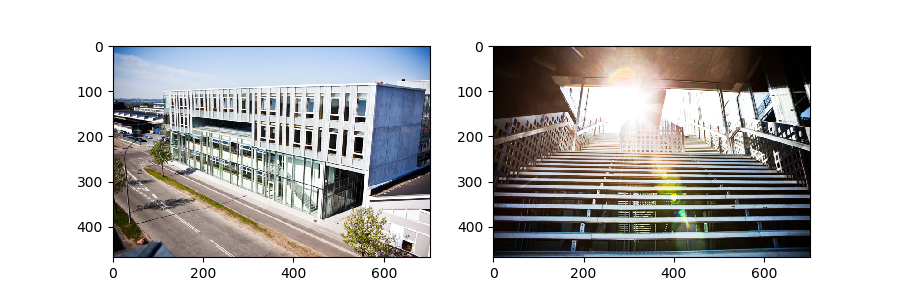

In [132]:
import scipy.misc

def download_image(url):
    filename = url[url.rindex('/')+1:]
    try:
        with open(filename, 'rb') as fp:
            return scipy.misc.imread(fp) / 255
    except FileNotFoundError:
        import urllib.request
        with open(filename, 'w+b') as fp, urllib.request.urlopen(url) as r:
            fp.write(r.read())
            return scipy.misc.imread(fp) / 255

img_facade = download_image('https://users-cs.au.dk/rav/ml/handins/h4/nygaard_facade.jpg')
img_stairs = download_image('https://users-cs.au.dk/rav/ml/handins/h4/nygaard_stairs.jpg')

fig, ax = plt.subplots(1, 2, figsize=(9, 3))
ax[0].imshow(img_facade)
ax[1].imshow(img_stairs)
plt.show()

Each pixel of the above images are represented by three values: (R, G, B). By using clustering we can find groups of pixels that are similar, and represent each group of pixels just by its centroid. The code below implements this idea. Try run it (it might take some time to run)

328536 3
Iterations	Cost
1 		 75512.7391911
2 		 15484.9816002
3 		 11185.1826853
4 		 9833.70883221
5 		 9202.71599364


<IPython.core.display.Javascript object>


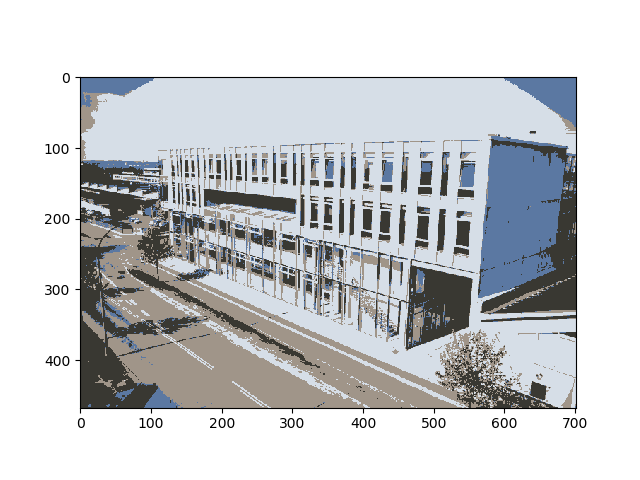

"def compress_facade(k=4):\n    img_facade = download_image('https://users-cs.au.dk/rav/ml/handins/h4/nygaard_facade.jpg')\n    compress_kmeans(img_facade, k=k)\n\ndef compress_stairs(k=4):\n    img_stairs = download_image('https://users-cs.au.dk/rav/ml/handins/h4/nygaard_stairs.jpg')\n    compress_kmeans(img_stairs, k=k)"

In [136]:
def compress_kmeans(im, k=4):
    height, width, depth = im.shape
    data = im.reshape((height * width, depth))
    clustering, centroids, score = lloyds_algorithm(data, k, 5)
    
    # make each entry of data to the value of it's cluster
    data_compressed = data
    
    for i in range(k): data_compressed[clustering == i] = centroids[i] 
    
    im_compressed = data_compressed.reshape((height, width, depth))
    plt.figure()
    plt.imshow(im_compressed)
    plt.show()

T = 10
k = 4
compress_kmeans(img_facade, k, T)

<b>Question 1</b>: Do you think higher/lower values of $k$ and $T$ gives "better" images? Try experiment with different values and make the best image you can. 

# Clustering digits
In previous weeks we did supervised learning on images of digits. In this exercise we will perform clustering on digits. Remember clustering can be considered a type of unsupervised learning. The main difference to what we did before is that  will attempt to find patterns in the data without using the labels.  

You can use the AUDigits if you want. The following code uses a data set of images called MNIST. They are almost identical. The only reason for using MNIST is that we can import it with just two lines of code. 

In [119]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/")

X = mnist.train.images
y = mnist.train.labels

print(X.shape)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
(55000, 784)


The following code runs Lloyd's algorithm on 5000 images from the MNIST dataset. It then visualizes the found centroids. 

Iterations	Cost
1 		 50523.3291755
2 		 41665.6952165
3 		 40255.9873622
4 		 39478.6799126
5 		 39087.0028428
6 		 38926.6366317
7 		 38730.1304451
8 		 38582.3050477
9 		 38496.1322678
10 		 38433.4880376
11 		 38383.5068289
12 		 38333.4429176
13 		 38288.3338257
14 		 38221.4575972
15 		 38126.2097437
16 		 38036.8939575
17 		 37940.9667668
18 		 37835.9453871
19 		 37790.1257649
20 		 37753.4600659
21 		 37700.324398
22 		 37646.2477389
23 		 37608.7104031
24 		 37583.0037674
25 		 37575.6599908
26 		 37572.0663192
27 		 37568.7258135
28 		 37565.7598502
29 		 37565.1916735
30 		 37564.2386805
31 		 37564.2386805
(10, 784)


<IPython.core.display.Javascript object>


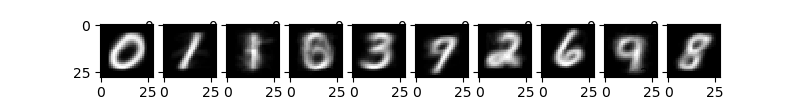

In [129]:
# One cluster for each digit
k = 10

# Run Lloyd's algorithm on 5000 images from the MNIST dataset. 
clustering, centroids, score = lloyds_algorithm(X[:1000], 10, 50)
print(centroids.shape)
fig, ax = plt.subplots(1, k, figsize=(8, 1))

for i in range(k):
    ax[i].imshow(centroids[i].reshape(28, 28), cmap='gray')
    
plt.show()

<b>Question 1: </b>Why do the centroids look like images of digits?

<b>Question 2: </b>Is it possible that not all digits are present? Why could this happen?